In [1]:
import pandas as pd 
import numpy as np
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt

In [27]:
metadata = pd.read_csv("../Project-Disney-World-DSF/metadata.csv")
hauntedhouse = pd.read_csv("../Project-Disney-World-DSF/haunted_mansion[87].csv")


In [28]:
metadata

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,NaN,5,0,0,1,2015,CHRISTMAS PEAK,0,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,01/02/2015,NaN,6,1,0,1,2015,CHRISTMAS,2,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,01/03/2015,NaN,7,2,0,1,2015,CHRISTMAS,3,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,01/04/2015,NaN,1,3,1,1,2015,CHRISTMAS,4,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,01/05/2015,NaN,2,4,1,1,2015,CHRISTMAS,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,08/27/2021,NaN,6,238,34,8,2021,NaN,11,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2075,08/28/2021,NaN,7,239,34,8,2021,NaN,10,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2076,08/29/2021,NaN,1,240,35,8,2021,NaN,9,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2077,08/30/2021,NaN,2,241,35,8,2021,NaN,8,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


**Preparing Hounted House Data**

In [29]:
#compute percentage of na-values per column; result: 96.59% of actual waiting times are na
hauntedhouse.isna().mean()

#extract and drop SACTMIN column from Df
act_times = hauntedhouse.copy()["SACTMIN"]
hauntedhouse = hauntedhouse.drop(["SACTMIN"], axis=1)


In [30]:
#format column datetime
hauntedhouse['datetime'] = pd.to_datetime(hauntedhouse['datetime'])


In [31]:
#drop rows with missing waiting times (coded as -999)
hauntedhouse.loc[hauntedhouse['SPOSTMIN'] == -999,'SPOSTMIN'] = np.nan
hauntedhouse = hauntedhouse.dropna(axis=0, subset="SPOSTMIN")
hauntedhouse = hauntedhouse.reset_index(drop=True)
hauntedhouse       


,date,datetime,SPOSTMIN
0,01/01/2015,2015-01-01 08:37:13,10.0
1,01/01/2015,2015-01-01 08:44:11,10.0
2,01/01/2015,2015-01-01 08:51:12,10.0
3,01/01/2015,2015-01-01 09:02:13,15.0
4,01/01/2015,2015-01-01 09:09:16,20.0
...,...,...,...
293282,12/28/2021,2021-12-28 22:36:08,13.0
293283,12/28/2021,2021-12-28 22:42:15,13.0
293284,12/28/2021,2021-12-28 22:48:12,13.0
293285,12/28/2021,2021-12-28 22:54:10,13.0


In [32]:
#create additional variables
hauntedhouse["HOUROFDAY"] = hauntedhouse.copy()['datetime'].dt.hour
hauntedhouse["MINUTEOFHOUR"] = hauntedhouse.copy()['datetime'].dt.minute
hauntedhouse["YEAR"] = hauntedhouse.copy()['datetime'].dt.year
hauntedhouse["MONTHOFYEAR"] = hauntedhouse.copy()['datetime'].dt.month
hauntedhouse["DAYOFMONTH"] = hauntedhouse.copy()['datetime'].dt.day

In [33]:
#create evenly spaced dataset: round waiting times to neareast ten minutes and aggregate
hauntedhouse["MINUTEOFHOUR"] = (hauntedhouse.copy()["MINUTEOFHOUR"]/10).round().astype(int) * 10
hauntedhouse = hauntedhouse.groupby(["YEAR", "MONTHOFYEAR", "DAYOFMONTH", "HOUROFDAY", "MINUTEOFHOUR"], as_index=False).agg(SPOSTMIN=('SPOSTMIN', 'mean'))
hauntedhouse

,YEAR,MONTHOFYEAR,DAYOFMONTH,HOUROFDAY,MINUTEOFHOUR,SPOSTMIN
0,2015,1,1,8,40,10.0
1,2015,1,1,8,50,10.0
2,2015,1,1,9,0,15.0
3,2015,1,1,9,10,20.0
4,2015,1,1,9,20,25.0
...,...,...,...,...,...,...
206460,2021,12,28,22,20,13.0
206461,2021,12,28,22,30,13.0
206462,2021,12,28,22,40,13.0
206463,2021,12,28,22,50,13.0


In [34]:
#recreate 'date' and 'datetime' variables for easy, flexible access and merging later

hauntedhouse["datetime"] = pd.to_datetime(dict(year=hauntedhouse.YEAR, month=hauntedhouse.MONTHOFYEAR, day=hauntedhouse.DAYOFMONTH, hour=hauntedhouse.HOUROFDAY, minute=hauntedhouse.MINUTEOFHOUR))
hauntedhouse["date"] = hauntedhouse["YEAR"].map(str) + '-' + (np.where(hauntedhouse["MONTHOFYEAR"]<10, '0', '')) + hauntedhouse["MONTHOFYEAR"].map(str) + '-' +  (np.where(hauntedhouse["DAYOFMONTH"]<10, '0', '')) + hauntedhouse["DAYOFMONTH"].map(str)
hauntedhouse['date'] = pd.to_datetime(hauntedhouse['date'])


In [35]:
hauntedhouse

,YEAR,MONTHOFYEAR,DAYOFMONTH,HOUROFDAY,MINUTEOFHOUR,SPOSTMIN,datetime,date
0,2015,1,1,8,40,10.0,2015-01-01 08:40:00,2015-01-01
1,2015,1,1,8,50,10.0,2015-01-01 08:50:00,2015-01-01
2,2015,1,1,9,0,15.0,2015-01-01 09:00:00,2015-01-01
3,2015,1,1,9,10,20.0,2015-01-01 09:10:00,2015-01-01
4,2015,1,1,9,20,25.0,2015-01-01 09:20:00,2015-01-01
...,...,...,...,...,...,...,...,...
206460,2021,12,28,22,20,13.0,2021-12-28 22:20:00,2021-12-28
206461,2021,12,28,22,30,13.0,2021-12-28 22:30:00,2021-12-28
206462,2021,12,28,22,40,13.0,2021-12-28 22:40:00,2021-12-28
206463,2021,12,28,22,50,13.0,2021-12-28 22:50:00,2021-12-28


Data Exploration

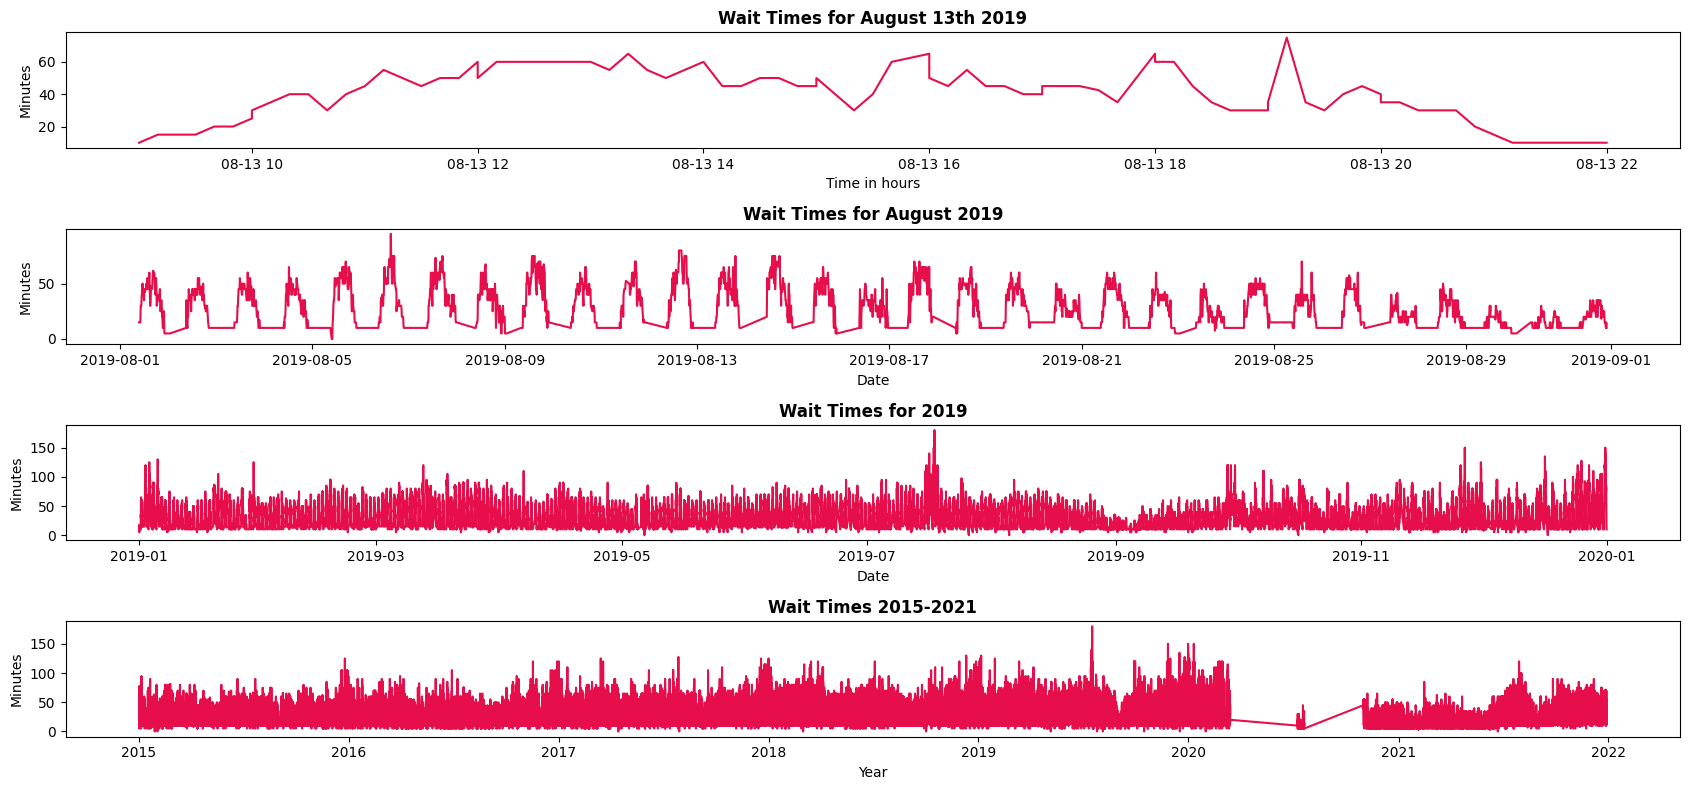

In [37]:
#plot wait times
summer_month = hauntedhouse.loc[(hauntedhouse["MONTHOFYEAR"]==8) & (hauntedhouse["YEAR"]==2019)] 

summer_day = hauntedhouse.loc[hauntedhouse["date"]=='08/13/2019'] 
year2019 = hauntedhouse.loc[hauntedhouse["YEAR"]==2019] 

fig, axs = plt.subplots(4, figsize=(17,8))
axs[0].plot(summer_day["datetime"], summer_day["SPOSTMIN"], color='#e60e4b')
axs[0].set_title("Wait Times for August 13th 2019", weight='bold')
axs[0].set_ylabel("Minutes")
axs[0].set_xlabel("Time in hours")

axs[1].plot(summer_month["datetime"], summer_month["SPOSTMIN"], color='#e60e4b')
axs[1].set_title("Wait Times for August 2019", weight='bold')
axs[1].set_ylabel("Minutes")
axs[1].set_xlabel("Date")

axs[2].plot(year2019["datetime"], year2019["SPOSTMIN"], color='#e60e4b')
axs[2].set_title("Wait Times for 2019", weight='bold')
axs[2].set_ylabel("Minutes")
axs[2].set_xlabel("Date")

axs[3].plot(hauntedhouse["datetime"], hauntedhouse["SPOSTMIN"], color='#e60e4b')
axs[3].set_title("Wait Times 2015-2021", weight='bold')
axs[3].set_ylabel("Minutes")
axs[3].set_xlabel("Year")

plt.tight_layout()
#plt.savefig('Plot1.png')

Text(0.5, 0, 'Year')

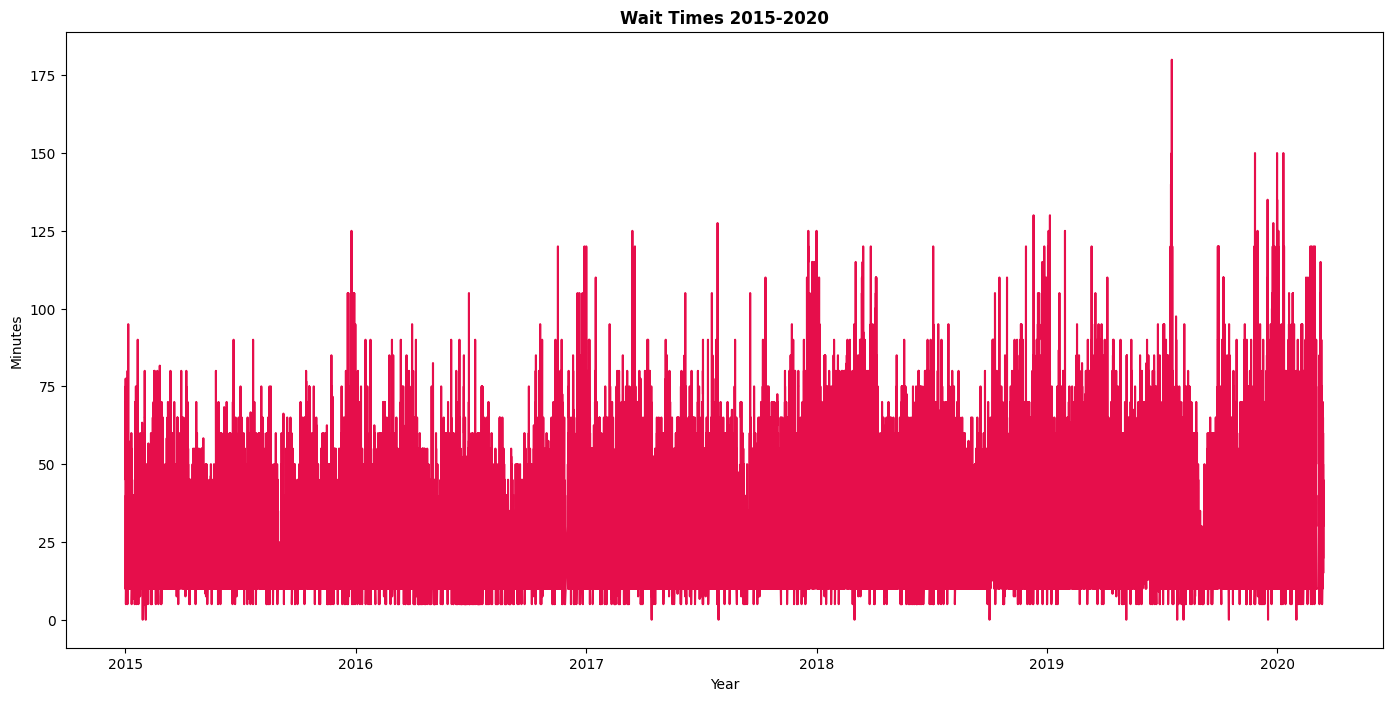

In [38]:
#only keep datapoints from before the pandemic
hauntedhouse = hauntedhouse.loc[hauntedhouse['datetime']<=datetime.datetime(2020,3,13,23,0,0)]
fig, ax = plt.subplots(figsize=(17,8))

ax.plot(hauntedhouse["datetime"], hauntedhouse["SPOSTMIN"], color='#e60e4b')
ax.set_title("Wait Times 2015-2020", weight='bold')
ax.set_ylabel("Minutes")
ax.set_xlabel("Year")


In [39]:
hauntedhouse.shape

(174021, 8)

**Preparing Metadata**

In [40]:
#remove variables related to Hollywood Studios Park in California (and not Walt Disney World in Florida)
metadata.columns.str.startswith('HS').sum() 
metadata.columns.str.endswith('_HS').sum() 

metadata = metadata.loc[:, ~metadata.columns.str.startswith('HS')]
metadata = metadata.loc[:, ~metadata.columns.str.endswith('_HS')]

metadata.shape

(2079, 145)

In [41]:
#looking at percentage of na-values per column
metadata.isna().mean().sort_values(ascending=False).head(20)

AKPRDDT2     1.000000
AKFIREN      1.000000
AKPRDDT1     1.000000
AKPRDDN      1.000000
EPFIRET2     0.997595
MKFIRET2     0.995190
HOLIDAYJ     0.979798
AKeventN     0.966811
WDWRaceN     0.958153
HOLIDAYN     0.897066
MKPRDDT2     0.890332
WDWeventN    0.881193
MKeventN     0.743627
MKPRDNT2     0.711881
MKPRDNN      0.653199
MKPRDNT1     0.653199
AKSHWNT2     0.552670
AKSHWNN      0.424723
AKSHWNT1     0.424723
EPeventN     0.417508
dtype: float64

In [42]:
#filter out columns with all na-values
metadata.dropna(axis=1, how='all', inplace=True)

#format date
metadata['DATE'] = pd.to_datetime(metadata['DATE'])

metadata.shape

(2079, 141)

In [43]:
#drop redundant columns
metadata = metadata.loc[:, metadata.columns != "MONTHOFYEAR"]
metadata = metadata.loc[:, metadata.columns != "YEAR"]

In [44]:
#function that deals with string percentage values (e.g. '70%') for columns that contain percentage of schools in session
def str_percent_to_float(dataframe):
    for col in dataframe.columns:
        if col.lower().startswith('insession'):
            dataframe[col] = dataframe[col].str.rstrip("%").astype(float)/100
            
str_percent_to_float(metadata)
metadata

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAYN,HOLIDAY,...,MKFIREN,EPFIREWK,EPFIRET1,EPFIRET2,EPFIREN,AKPRDDAY,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2015-01-01,NaN,5,0,0,CHRISTMAS PEAK,0,5,nyd,1,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
1,2015-01-02,NaN,6,1,0,CHRISTMAS,2,5,NaN,0,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
2,2015-01-03,NaN,7,2,0,CHRISTMAS,3,0,NaN,0,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
3,2015-01-04,NaN,1,3,1,CHRISTMAS,4,0,NaN,0,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
4,2015-01-05,NaN,2,4,1,CHRISTMAS,5,0,NaN,0,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,NaN,6,238,34,NaN,11,0,NaN,0,...,Happily Ever After,1,22:00,NaN,Epcot Forever,0,0,NaN,NaN,NaN
2075,2021-08-28,NaN,7,239,34,NaN,10,0,NaN,0,...,Happily Ever After,1,22:00,NaN,Epcot Forever,0,0,NaN,NaN,NaN
2076,2021-08-29,NaN,1,240,35,NaN,9,0,NaN,0,...,Happily Ever After,1,22:00,NaN,Epcot Forever,0,0,NaN,NaN,NaN
2077,2021-08-30,NaN,2,241,35,NaN,8,0,NaN,0,...,Happily Ever After,1,21:00,NaN,Epcot Forever,0,0,NaN,NaN,NaN


In [45]:
#function that deals with string times of form '9:00' or '25:00'; converts to hours since midnight (float) for consistency and usability
cols = ["MKOPEN", "MKCLOSE", "MKEMHOPEN", "MKEMHCLOSE", "MKOPENYEST", "MKCLOSEYEST", "MKOPENTOM", "MKCLOSETOM", "EPOPEN", "EPCLOSE", "EPEMHOPEN",
"EPEMHCLOSE", "EPOPENYEST", "EPCLOSEYEST", "EPOPENTOM", "EPCLOSETOM", "AKOPEN", "AKCLOSE", "AKEMHOPEN", "AKEMHCLOSE", "AKOPENYEST", "AKCLOSEYEST",
"AKOPENTOM", "AKCLOSETOM", "MKPRDDT1", "MKPRDDT2", "MKPRDNT1", "MKPRDNT2", "MKFIRET1", "MKFIRET2", "EPFIRET1", "EPFIRET2", "AKSHWNT1", "AKSHWNT2"]

for col in cols:
    metadata[col].fillna("99", inplace=True)  #replace na with '99' to indicate outliers; e.g. when a second firework (MKFIRET2) is not taking place that day 



In [46]:
def format_times(x):
    if len(x)==4:
        time = '0'+ x
    elif len(x)==5 and x > '24:00':
        hour = int(x[:2])-24
        minute = x[-2:]
        time = '0' + str(hour) + ':' + minute
    elif x == '24:00':
        time = '00:00'
    else:
        time = x
    return time

def str_times_to_numerical(dataframe):
    for col in cols:
        dataframe[col] = dataframe[col].apply(format_times)
        dataframe[col] = dataframe[col].apply(lambda y: y.rstrip(':'))
        dataframe[col] = dataframe[col].apply(lambda x: (float(x[:2])+(float(x[-2:])/60)) if x[0] != 0 else (float(x[1])+(float(x[-2:])/60)))

str_times_to_numerical(metadata)


In [47]:
#one-hot encoding of categorical features
categorical_features = ["WDW_TICKET_SEASON", "SEASON", "HOLIDAYN", "WDWTICKETSEASON", "WDWRaceN", "WDWeventN", "WDWSEASON", "MKeventN", "EPeventN", "AKeventN", "HOLIDAYJ", "MKPRDDN", "MKPRDNN", "MKFIREN", "EPFIREN", "AKSHWNN"]

transformer = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough')

transformed = transformer.fit_transform(metadata)
encoded_metadata = pd.DataFrame(transformed, columns=transformer.get_feature_names())
#new name of columns for i encoded column: 'onehotencoder__xi_oldcategoryname'

encoded_metadata.shape


c:\Users\Sara Knapp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(2079, 275)

In [48]:
#function for filling missing values, to be used at later time
def imputation(dataframe):
        for col in dataframe.columns:
                dataframe[col] = dataframe[col].fillna(method='bfill')
                dataframe[col] = dataframe[col].fillna(dataframe[col].median())
        return dataframe

Merge datasets

In [49]:
#change name of "DATE" column in metadata to fit with Haunted House 
encoded_metadata.rename(columns={"DATE":"date"}, inplace=True)

In [50]:
#merge metadata and waiting time data 
waittimes = pd.merge(hauntedhouse, encoded_metadata, how='left', on='date')

In [51]:
#drop redundant time columns
waittimes = waittimes.loc[:, waittimes.columns != "date"]
waittimes = waittimes.loc[:, waittimes.columns != "DAYOFWEEK"]
waittimes = waittimes.loc[:, waittimes.columns != "DAYOFYEAR"]
waittimes = waittimes.loc[:, waittimes.columns != "WEEKOFYEAR"]
waittimes


,YEAR,MONTHOFYEAR,DAYOFMONTH,HOUROFDAY,MINUTEOFHOUR,SPOSTMIN,datetime,onehotencoder__x0_peak,onehotencoder__x0_regular,onehotencoder__x0_value,...,MKFIREWK,MKFIRET1,MKFIRET2,EPFIREWK,EPFIRET1,EPFIRET2,AKPRDDAY,AKSHWNGT,AKSHWNT1,AKSHWNT2
0,2015,1,1,8,40,10.0,2015-01-01 08:40:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
1,2015,1,1,8,50,10.0,2015-01-01 08:50:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
2,2015,1,1,9,0,15.0,2015-01-01 09:00:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
3,2015,1,1,9,10,20.0,2015-01-01 09:10:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
4,2015,1,1,9,20,25.0,2015-01-01 09:20:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174016,2020,3,13,21,20,20.0,2020-03-13 21:20:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,1,20.25,100.65
174017,2020,3,13,21,30,30.0,2020-03-13 21:30:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,1,20.25,100.65
174018,2020,3,13,21,40,30.0,2020-03-13 21:40:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,1,20.25,100.65
174019,2020,3,13,21,50,30.0,2020-03-13 21:50:00,0.0,0.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,1,20.25,100.65


Feature Selection and Predictive Models

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler
from math import sqrt
import calendar

In [53]:
waittimes = imputation(waittimes)

In [54]:
X = waittimes.loc[:, waittimes.columns != "SPOSTMIN"]
X = X.loc[:, X.columns != "datetime"]
y = np.array(waittimes["SPOSTMIN"])
X.shape, y.shape

((174021, 276), (174021,))

In [55]:
ts_cv = TimeSeriesSplit(
    n_splits=3,
    test_size = int(0.2*len(X))
)
#inspect the first split
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
X.iloc[test_0]



,YEAR,MONTHOFYEAR,DAYOFMONTH,HOUROFDAY,MINUTEOFHOUR,onehotencoder__x0_peak,onehotencoder__x0_regular,onehotencoder__x0_value,onehotencoder__x0_nan,onehotencoder__x1_CHRISTMAS,...,MKFIREWK,MKFIRET1,MKFIRET2,EPFIREWK,EPFIRET1,EPFIRET2,AKPRDDAY,AKSHWNGT,AKSHWNT1,AKSHWNT2
69609,2017,3,5,17,60,0.0,0.0,1.0,0.0,0.0,...,1,20.000000,100.65,1,21.0,100.65,0,2,19.25,20.5
69610,2017,3,5,18,0,0.0,0.0,1.0,0.0,0.0,...,1,20.000000,100.65,1,21.0,100.65,0,2,19.25,20.5
69611,2017,3,5,18,10,0.0,0.0,1.0,0.0,0.0,...,1,20.000000,100.65,1,21.0,100.65,0,2,19.25,20.5
69612,2017,3,5,18,20,0.0,0.0,1.0,0.0,0.0,...,1,20.000000,100.65,1,21.0,100.65,0,2,19.25,20.5
69613,2017,3,5,18,30,0.0,0.0,1.0,0.0,0.0,...,1,20.000000,100.65,1,21.0,100.65,0,2,19.25,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104408,2018,3,18,19,10,1.0,0.0,0.0,0.0,0.0,...,1,20.916667,100.65,1,21.0,100.65,0,2,20.75,22.0
104409,2018,3,18,19,20,1.0,0.0,0.0,0.0,0.0,...,1,20.916667,100.65,1,21.0,100.65,0,2,20.75,22.0
104410,2018,3,18,19,30,1.0,0.0,0.0,0.0,0.0,...,1,20.916667,100.65,1,21.0,100.65,0,2,20.75,22.0
104411,2018,3,18,19,40,1.0,0.0,0.0,0.0,0.0,...,1,20.916667,100.65,1,21.0,100.65,0,2,20.75,22.0


In [56]:
X.iloc[train_0]

,YEAR,MONTHOFYEAR,DAYOFMONTH,HOUROFDAY,MINUTEOFHOUR,onehotencoder__x0_peak,onehotencoder__x0_regular,onehotencoder__x0_value,onehotencoder__x0_nan,onehotencoder__x1_CHRISTMAS,...,MKFIREWK,MKFIRET1,MKFIRET2,EPFIREWK,EPFIRET1,EPFIRET2,AKPRDDAY,AKSHWNGT,AKSHWNT1,AKSHWNT2
0,2015,1,1,8,40,0.0,0.0,0.0,1.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
1,2015,1,1,8,50,0.0,0.0,0.0,1.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
2,2015,1,1,9,0,0.0,0.0,0.0,1.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
3,2015,1,1,9,10,0.0,0.0,0.0,1.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
4,2015,1,1,9,20,0.0,0.0,0.0,1.0,0.0,...,1,21.0,100.65,1,21.0,100.65,0,0,100.65,100.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69604,2017,3,5,17,10,0.0,0.0,1.0,0.0,0.0,...,1,20.0,100.65,1,21.0,100.65,0,2,19.25,20.50
69605,2017,3,5,17,20,0.0,0.0,1.0,0.0,0.0,...,1,20.0,100.65,1,21.0,100.65,0,2,19.25,20.50
69606,2017,3,5,17,30,0.0,0.0,1.0,0.0,0.0,...,1,20.0,100.65,1,21.0,100.65,0,2,19.25,20.50
69607,2017,3,5,17,40,0.0,0.0,1.0,0.0,0.0,...,1,20.0,100.65,1,21.0,100.65,0,2,19.25,20.50


In [57]:
#Random Forest

rf_pipe = Pipeline(
   [('random_forest', RandomForestRegressor(n_estimators=15, max_depth=70, random_state=42))]
)

rf_pipe.fit(X.iloc[train_0], y[train_0])
preds = rf_pipe.predict(X.iloc[test_0])



In [59]:
sqrt(mean_squared_error(y[test_0], preds))

13.741668873041345

Visualize Performance for a Random Day

In [155]:
#function that plots posted wait times and predictions for a specific day
#expects integer lists as input and dimensions of the figure as integers

def plot_results (years, months, days, nrows, ncols):

    fig, axs = plt.subplots(nrows, ncols, figsize=(12,8))
    if len(years) % 2 != 0:
        fig.delaxes(axs.ravel()[-1])
        
    for date in range(len(years)):
        rows = X.iloc[test_0].loc[(X["YEAR"]==years[date]) & (X["MONTHOFYEAR"]==months[date]) & (X["DAYOFMONTH"]==days[date])]
        rows_reset = X.iloc[test_0].reset_index()
        rows_reset = rows_reset.loc[(rows_reset["YEAR"]==years[date]) & (rows_reset["MONTHOFYEAR"]==months[date]) & (rows_reset["DAYOFMONTH"]==days[date])]
        rows_reset_indeces = rows_reset.index.tolist()
        indeces_test0 = rows.index.tolist()

        axs.ravel()[date].plot(waittimes.iloc[indeces_test0]["datetime"], y[indeces_test0], label = "Posted", color='#013163')
        axs.ravel()[date].plot(waittimes.iloc[indeces_test0]["datetime"], preds[rows_reset_indeces], color='#a6033f', label="Prediction")
        axs.ravel()[date].set_ylabel("Minutes")
        axs.ravel()[date].set_xlabel("Hours")
        axs.ravel()[date].set_title(f'{calendar.month_name[months[date]]} {days[date]}st {years[date]}' if days[date]==1 else f'{calendar.month_name[months[date]]} {days[date]}rd {years[date]}' if days[date] in [3, 23] else f'{calendar.month_name[months[date]]} {days[date]}nd {years[date]}' if days[date] in [2, 22] else f'{calendar.month_name[months[date]]} {days[date]}th {years[date]}', weight='bold')
        axs.ravel()[date].legend()
    plt.suptitle("Comparison of Posted Wait Times and Prediction", weight='bold')
    plt.tight_layout()
    plt.show()



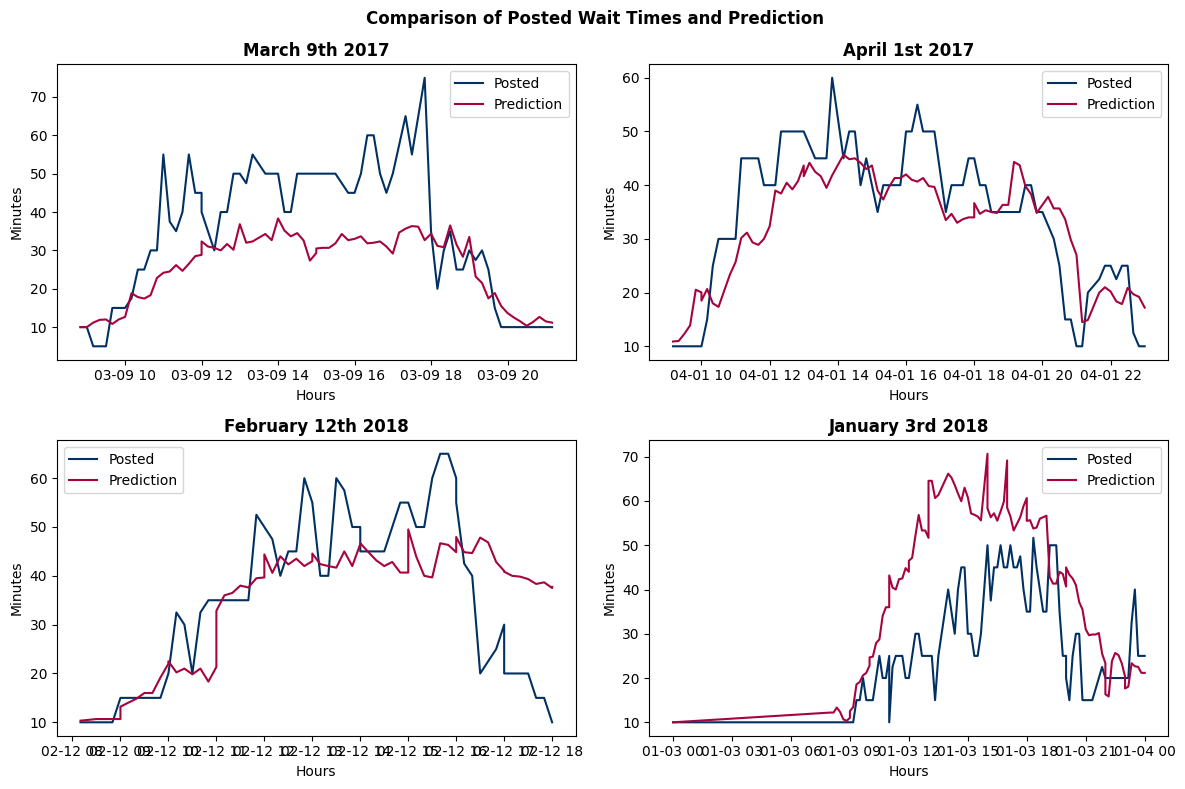

In [158]:
plot_results([2017, 2017, 2018, 2018], [3, 4, 2, 1], [9, 1, 12, 3], nrows=2, ncols=2)

In [131]:
axs.ravel()[1].set_title("HAllo")

TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

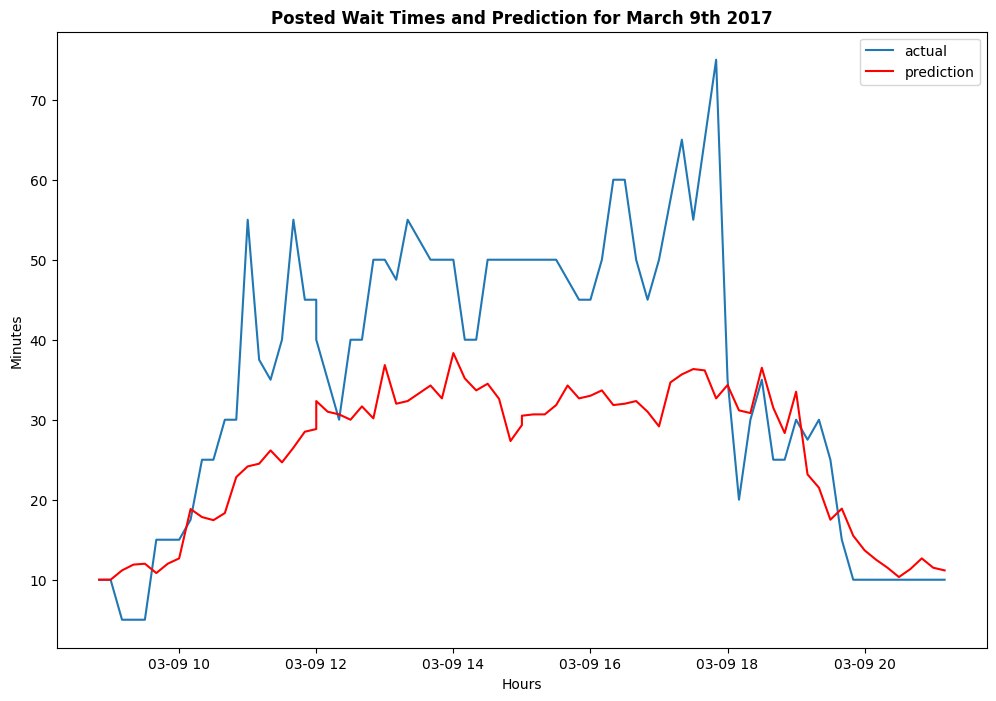

In [61]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(waittimes.iloc[indeces_test0]["datetime"], y[indeces_test0], label = "actual")
ax.plot(waittimes.iloc[indeces_test0]["datetime"], preds[rows_reset_indeces], color='red', label="prediction")
ax.set_ylabel("Minutes")
ax.set_xlabel("Hours")
ax.set_title("Posted Wait Times and Prediction for March 9th 2017", weight='bold')
ax.legend()

In [62]:
def evaluate (model, X, y, cv):
    cv_results = cross_validate(
        model, X, y, cv=cv, scoring= ["r2", "neg_root_mean_squared_error"],  
    )
    r_squared = -cv_results["test_r2"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"R_squared:   {r_squared.mean():.3f} +/- {r_squared.std():.3f}\n"
        f"RMSE:        {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

In [63]:
evaluate(rf_pipe, X, y, cv=ts_cv)

R_squared:   -0.519 +/- 0.025
RMSE:        14.106 +/- 0.939


In [64]:
#Linear Regression
scaler = StandardScaler()
lr_pipe = Pipeline(
   [('std', scaler), ('linear', LinearRegression())]
)

evaluate(lr_pipe, X, y, cv=ts_cv)
#ohne Scaler besser????

R_squared:   26327507815572468416905216.000 +/- 26633772023711377932681216.000
RMSE:        84692243646023.297 +/- 51192010880414.000


Looking at Feature Correlation????

In [65]:
waittime_corr = waittimes.corr()["SPOSTMIN"]
selected_features = waittime_corr[abs(waittime_corr) > 0.2].sort_values(ascending=False)
selected_features


C:\Users\Sara Knapp\AppData\Local\Temp\ipykernel_461896\3871626051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  waittime_corr = waittimes.corr()["SPOSTMIN"]


SPOSTMIN                                 1.000000
onehotencoder__x13_Happily Ever After    0.271368
YEAR                                     0.270313
MKPRDNT1                                 0.258798
onehotencoder__x12_nan                   0.258417
CapacityLost_EP                          0.255910
CapacityLostWGT_MK                       0.254675
CapacityLostWGT_EP                       0.252905
CapacityLost_MK                          0.251156
onehotencoder__x15_Rivers of Light       0.240719
AKSHWNGT                                 0.233401
MKPRDNT2                                 0.226975
CapacityLostWGT_AK                       0.214173
CapacityLost_AK                          0.212948
onehotencoder__x15_nan                  -0.210812
AKSHWNT1                                -0.213407
MKPRDNGT                                -0.251834
Name: SPOSTMIN, dtype: float64